# Purpose: 

Merge files created from steps 1 & 2: 
1. [BILL DATA] bill_name_collection
2. LOBBYING DATA: scraping_data_collection.ipynb
3. Filter on firms that have lobbied on more than 5 bills 

Final Outputs: 
- 'complete_bills_info2.csv'
- orgs_more_than_six_bills.csv


In [19]:
# Loading required packages: 

import pandas as pd 
import os 
import matplotlib.pyplot as plt 
## repeated printouts and wide-format text:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'


import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns


# Fixing fonts:
plt.rcParams["font.family"] = "Times New Roman"


os.getcwd()

'c:\\Users\\Sanha Tahir\\Downloads\\GeorgeTown\\DS3\\Final Project'

In [3]:
ev = pd.read_csv('lobbying_results3_with_text.csv')

In [4]:
bill = pd.read_csv('bill_extraction_completion.csv')
# Define a function that operates on a row
def creating_IDs(row):
    classif = row["classif"].lower()
    nmbr = str(row["bill_number"])
    
    final = classif + nmbr + "-118"
    return final

# Apply the function to each row along the columns (axis=1)
bill['ID'] = bill.apply(creating_IDs, axis=1)

In [5]:
merged_df = pd.merge(ev, bill, on='ID', how='right')
merged_df.to_csv('complete_bills_info2.csv')

### Getting some base characteristics: 

In [21]:
merged = pd.read_csv('complete_bills_info2.csv')
merged.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,ID,Bill_Title,Sponsor,Co_Sponsors,Organization,Year,Issue_Count,...,Unnamed: 93,Unnamed: 94,bill_number,classif,title,policy_area,main_boi_party,main_boi_name,co_sponsor_party_list,extraction_status
0,0,0.0,0.0,hconres10-118,H.Con.Res.10: Expressing the sense of Congress...,Tom Tiffany (R-WI),"Brian Babin (R-TX), Gus Bilirakis (R-FL), Lau...",PharmaEssentia Corp,2023.0,1.0,...,NaN,NaN,10,HCONRES,Expressing the sense of Congress that the Unit...,International Affairs,R,"Rep. Tiffany, Thomas P. [R-WI-7]","Rep. Perry, Scott [R-PA-10] Rep. Donalds, Byro...",complete
1,1,2.0,2.0,hconres12-118,H.Con.Res.12: Expressing the sense of Congress...,Kat Cammack (R-FL),"Brad Finstad (R-MN), Michelle Fischbach (R-MN...",American Sugar Alliance,2023.0,5.0,...,NaN,NaN,12,HCONRES,Expressing the sense of Congress that all dire...,Foreign Trade and International Finance,R,"Rep. Cammack, Kat [R-FL-3]","Rep. Kildee, Daniel T. [D-MI-8] Rep. Letlow, J...",complete
2,2,3.0,3.0,hconres13-118,H.Con.Res.13: Supporting the Local Radio Freed...,Steve Womack (R-AR),"Robert B Aderholt (R-AL), Mark Alford (R-MO),...",iHeartMedia Inc,2023.0,17.0,...,NaN,NaN,13,HCONRES,Supporting the Local Radio Freedom Act.,"Science, Technology, Communications",R,"Rep. Womack, Steve [R-AR-3]","Rep. Castor, Kathy [D-FL-14] Rep. Amodei, Mark...",complete
3,3,4.0,4.0,hconres13-118,H.Con.Res.13: Supporting the Local Radio Freed...,Steve Womack (R-AR),"Robert B Aderholt (R-AL), Mark Alford (R-MO),...",National Assn of Broadcasters,2023.0,14.0,...,NaN,NaN,13,HCONRES,Supporting the Local Radio Freedom Act.,"Science, Technology, Communications",R,"Rep. Womack, Steve [R-AR-3]","Rep. Castor, Kathy [D-FL-14] Rep. Amodei, Mark...",complete
4,4,5.0,5.0,hconres13-118,H.Con.Res.13: Supporting the Local Radio Freed...,Steve Womack (R-AR),"Robert B Aderholt (R-AL), Mark Alford (R-MO),...",Recording Industry Assn of America,2023.0,3.0,...,NaN,NaN,13,HCONRES,Supporting the Local Radio Freedom Act.,"Science, Technology, Communications",R,"Rep. Womack, Steve [R-AR-3]","Rep. Castor, Kathy [D-FL-14] Rep. Amodei, Mark...",complete


### Bill Structures:

In [35]:
pd.set_option("display.max_rows", 10)

class_firms = merged[["Organization", "classif"]].value_counts().reset_index()
class_firms[class_firms.Organization == "Amazon.com"]
class_firms[class_firms.Organization == "Alphabet Inc"]
class_firms[class_firms.Organization == "Meta"]
class_firms[class_firms.Organization == "Microsoft Corp"]

,Organization,classif,0
300,Amazon.com,HR,10
401,Amazon.com,S,8


,Organization,classif,0
271,Alphabet Inc,S,11
430,Alphabet Inc,HR,8


,Organization,classif,0
388,Meta,S,8
1115,Meta,HR,3


,Organization,classif,0
124,Microsoft Corp,S,17
279,Microsoft Corp,HR,10


In [98]:
import matplotlib.pyplot as plt 
from brokenaxes import brokenaxes
import seaborn as sns 
import numpy as np
import re

In [31]:
def extracting_bill_type(ss): 
    
    pattern = r"([a-zA-Z]+)(\d+)-\d+"

    # Use re.search to find the match
    match = re.search(pattern, ss)

    # Extract the matched part (prefix followed by a number)
    if match:
        prefix = match.group(1)
    else:
        print("No match found.")

    return prefix


In [34]:
# Number of unique bills and overall structure: 
print("Unique bills: ", len(pd.unique(merged.ID)))

unique_bills = pd.DataFrame(pd.unique(merged.ID), columns=['Unique_ID'])
unique_bills["bill_type"] = [extracting_bill_type(ss) for ss in unique_bills.Unique_ID]
print("Bill Structure: ")
unique_bills["bill_type"].value_counts()

Unique bills:  7128
Bill Structure: 


hr         4291
s          1849
hres        557
sres        255
hjres        62
hconres      55
sjres        42
sconres      17
Name: bill_type, dtype: int64

### Firms:

In [43]:
# Assuming 'Organization' is the column containing organization names in the DataFrame 'merged'
number_of_bills = pd.DataFrame(merged['Organization'].value_counts().reset_index())

# Rename columns for clarity
number_of_bills.columns = ['Organization', 'Number_of_Bills']

# Sort the DataFrame by descending values of 'Number_of_Bills'
number_of_bills_sorted = number_of_bills.sort_values(by='Number_of_Bills', ascending=False)
number_of_bills_sorted.head()

,Organization,Number_of_Bills
0,National Treasury Employees Union,281
1,US Chamber of Commerce,181
2,Disabled American Veterans,155
3,National Assn of Mutual Insurance Companies,120
4,Paralyzed Veterans of America,104


In [47]:
print("Unique firms: ", len(pd.unique(merged.Organization)))

Unique firms:  2491


5.855823293172691

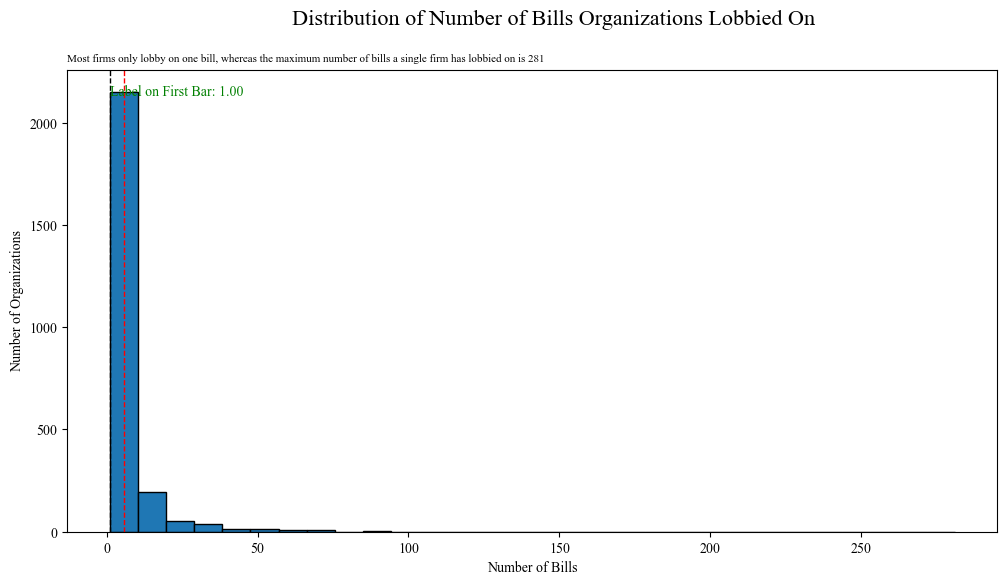

In [108]:
plt.figure(figsize=(12, 6))


# plt.hist(number_of_bills.Number_of_Bills, bins=40)
plt.axvline(x= number_of_bills.Number_of_Bills.mean() , color='red', linestyle='dashed', linewidth=1, label='Mean')

plt.axvline(x= 1, color='black', linestyle='dashed', linewidth=1, label='Mean')


# Label the first bar
counts, edges, patches = plt.hist(number_of_bills.Number_of_Bills, bins=30, edgecolor='black')
first_bar_value = edges[0]
plt.text(first_bar_value, max(counts), f'Label on First Bar: {first_bar_value:.2f}', ha='left', va='center', color='green')


plt.ylabel("Number of Organizations")
plt.xlabel("Number of Bills")
plt.suptitle("Distribution of Number of Bills Organizations Lobbied On", y=0.98, x =0.53, fontsize=16)
plt.title("Most firms only lobby on one bill, whereas the maximum number of bills a single firm has lobbied on is 281", loc='left', fontsize=8)

plt.show();

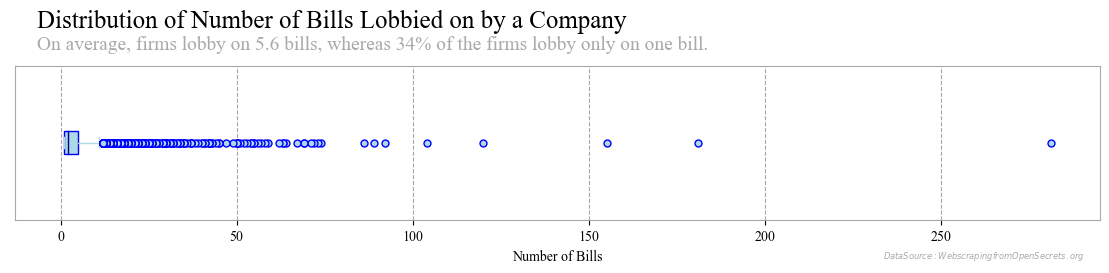

In [154]:
# # Create a boxplot with no outline and a blue background

fig, ax = plt.subplots(figsize=(14, 2)) 
boxplot = ax.boxplot(number_of_bills.Number_of_Bills, vert=False, patch_artist=True, 
                        boxprops={'facecolor': 'lightblue', 'edgecolor': 'blue'}, 
                        medianprops={'color': 'darkblue'},
                                            whiskerprops={'color': 'lightblue'}, capprops={'color': 'lightblue'})

# Customize the color of the outlier boxes
for flier in boxplot['fliers']:
    flier.set(marker='o', markersize=5, markeredgecolor='blue', markerfacecolor='lightblue')

ax.spines['top'].set_visible(True)
ax.spines['top'].set_color('darkgrey')
ax.spines['right'].set_visible(True)
ax.spines['right'].set_color('darkgrey')
ax.spines['left'].set_visible(True)
ax.spines['left'].set_color('darkgrey')
ax.spines['bottom'].set_visible(True)
ax.spines['bottom'].set_color('darkgrey')



title_string = 'Distribution of Number of Bills Lobbied on by a Company'
subtitle_string = 'On average, firms lobby on 5.6 bills, whereas 34% of the firms lobby only on one bill.'
ax.text(0.02, 1.25, title_string, transform=ax.transAxes, fontsize=18)

ax.set_title(subtitle_string, x=0.02, y=1.05, ha='left', fontsize= 14, color='darkgrey')

ax.text(0.8, -0.25, "$\it{Data Source:  Webscraping  from  OpenSecrets.org}$", transform=ax.transAxes, fontsize=6, color='darkgrey')
# ax.text(0.05, 0.62, "Mean: 5.9", transform=ax.transAxes, fontsize=8, color='darkgrey')


plt.yticks([])
plt.grid(True, axis='x', linestyle='--', color='gray', alpha=0.7)
plt.rcParams["font.family"] = "Times New Roman"

plt.xlabel("Number of Bills")
plt.show();


In [155]:
orgs_on_more_than_five_bill = merged['Organization'].value_counts()[merged['Organization'].value_counts() > number_of_bills.Number_of_Bills.mean()].index.tolist()
len(merged['Organization'])
len(pd.unique( merged['Organization']))
len(pd.unique(orgs_on_more_than_five_bill))

len(orgs_on_more_than_five_bill)/len(pd.unique( merged['Organization']))

18166

2491

622

0.24969891609795264

In [156]:
filtered = merged[merged['Organization'].isin(orgs_on_more_than_five_bill)]

len(filtered)
len(pd.unique(filtered.Organization))

len(merged['Organization'])
len(pd.unique(merged.Organization))

10769

622

18166

2491

In [161]:
df_removed = filtered.iloc[:, 3:]
df_removed.to_csv("orgs_more_than_six_bills.csv")

### Firms and funds:

In [96]:
# Adding funding data: 

# Adding funds data: 

funds = pd.read_csv("lobbying_and_their_funds.csv" ,index_col=None)
funds["funds_int"] = [int(x.replace("$", "").replace(",", "")) for x in funds["Total"]]
funds = funds.groupby("Company").agg({"funds_int" : "sum"}).reset_index()
len(pd.unique(funds.Company))
firms_and_funds = pd.merge(merged, funds[['Company', 'funds_int']], right_on ='Company', left_on = "Organization", how='left')

firms_and_funds = firms_and_funds.groupby("Company").agg({"funds_int" : "sum",
                                        'ID' : 'nunique'}).reset_index()

624

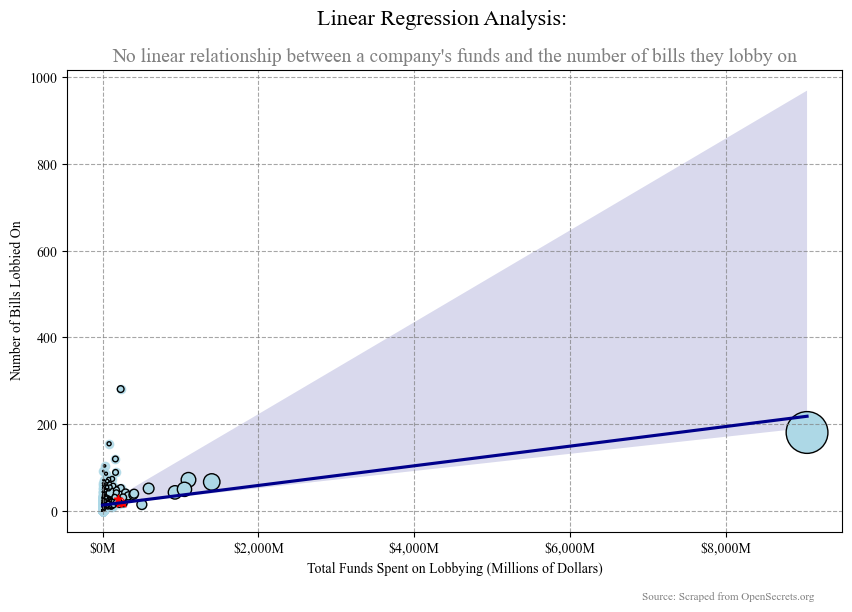

In [102]:
# Getting regression on funds and 
def currency_formatter(x, pos):
    return f"${int(x/1000000):,}M"

# Sample data
x = firms_and_funds["funds_int"]
y = firms_and_funds["ID"]

x_subset = firms_and_funds["funds_int"][firms_and_funds["Company"].isin(["Amazon.com", "Alphabet Inc", "Microsoft Corp", "Meta"])]
y_subset = firms_and_funds["ID"][firms_and_funds["Company"].isin(["Amazon.com", "Alphabet Inc", "Microsoft Corp", "Meta"])]


plt.figure(figsize=(10, 6))


# Fit a linear regression model and plot the regression line with a 95% CI
sns.regplot(x=x, y=y,  ci=95, color='darkblue', line_kws={'color': 'darkblue'}, scatter_kws={'color': 'lightblue'})
plt.scatter(x=x, y=y, s = x/10000000, color='lightblue', marker='o',
            edgecolors='black')
plt.scatter(x_subset, y_subset, color='red', marker='*', label='Highlighted Firms')

plt.xlabel("Total Funds Spent on Lobbying (Millions of Dollars)")
plt.gca().xaxis.set_major_formatter(FuncFormatter(currency_formatter))


plt.ylabel("Number of Bills Lobbied On")

# Add title and subtitle
plt.suptitle("Linear Regression Analysis:", y=0.98, fontsize=16)
plt.title("No linear relationship between a company's funds and the number of bills they lobby on", fontsize=14, color='gray')


# Add caption
caption_text = "Source: Scraped from OpenSecrets.org"
plt.figtext(0.7, 0.001, caption_text, ha="left", va="center", fontsize=8, color='gray')


plt.grid(linestyle='--', color='gray', alpha=0.7)
plt.show();


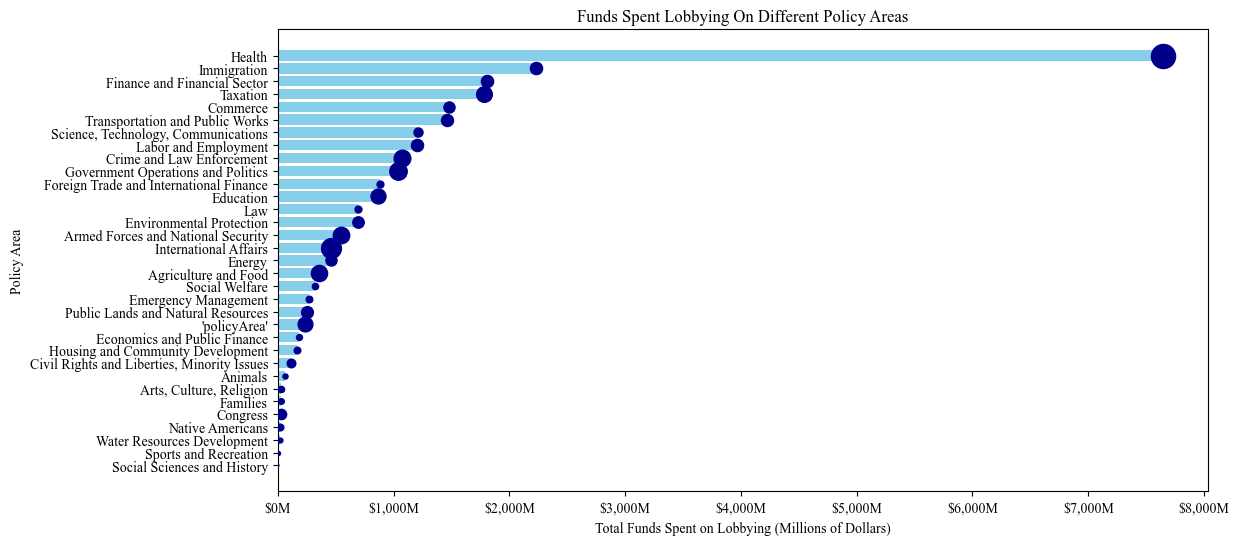

In [107]:
funds = pd.read_csv("lobbying_and_their_funds.csv" ,index_col=None)
funds["funds_int"] = [int(x.replace("$", "").replace(",", "")) for x in funds["Total"]]
funds = funds.groupby("Company").agg({"funds_int" : "sum"}).reset_index()

firms_and_funds = pd.merge(merged, funds[['Company', 'funds_int']], right_on ='Company', left_on = "Organization", how='left')
policy_areas_funds = firms_and_funds.groupby("policy_area").agg({"funds_int" : "sum", 'ID':'nunique'}).reset_index()

categories = policy_areas_funds.policy_area
values = policy_areas_funds.funds_int
bubble_sizes  = policy_areas_funds.ID/3

sorted_data = sorted(zip(categories, values, bubble_sizes), key=lambda x: x[1], reverse=False)
categories, values, bubble_sizes = zip(*sorted_data)

plt.figure(figsize=(12, 6))

plt.barh(categories, values, color='skyblue')

for i, (category, value, size) in enumerate(zip(categories, values, bubble_sizes)):
    plt.scatter(value, i, s=size, color='darkblue', zorder=5)  # zorder ensures bubbles are on top


plt.xlabel("Total Funds Spent on Lobbying (Millions of Dollars)")
plt.gca().xaxis.set_major_formatter(FuncFormatter(currency_formatter))
plt.ylabel('Policy Area')
plt.title('Funds Spent Lobbying On Different Policy Areas')

plt.show();

C:\Users\Sanha Tahir\AppData\Local\Temp\ipykernel_25588\1224552402.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(categories, rotation=45, ha='right')


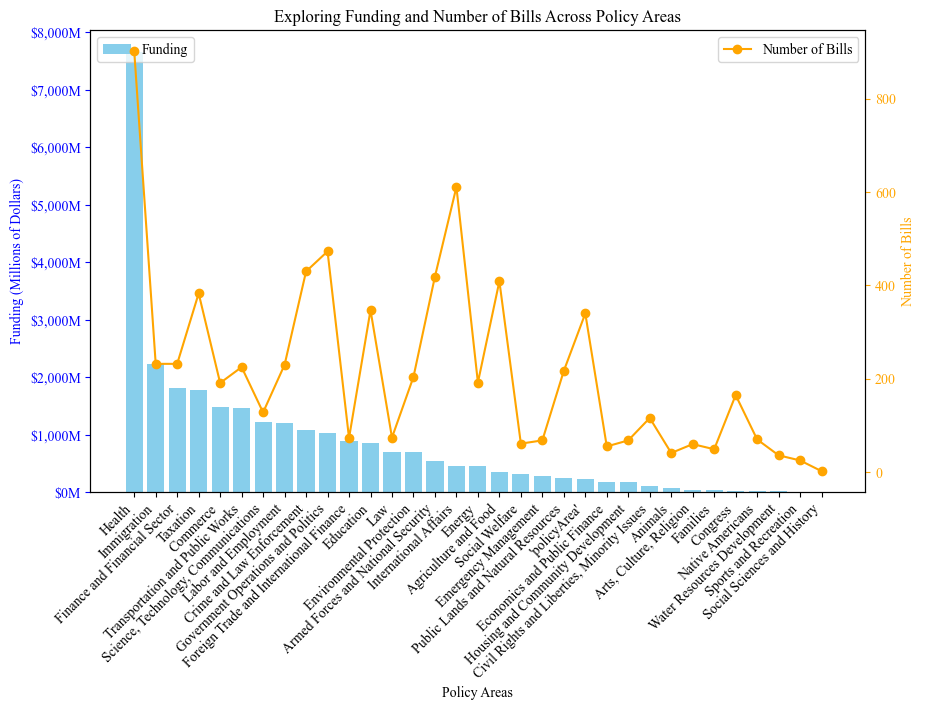

In [109]:

# Sample data
categories = ['Category A', 'Category B', 'Category C']
funding_values = [100, 150, 200]
num_bills_values = [5, 8, 12]


categories = policy_areas_funds.policy_area
funding_values = policy_areas_funds.funds_int
num_bills_values  = policy_areas_funds.ID


# Zip the data and sort by funding values in descending order
sorted_data = sorted(zip(categories, funding_values, num_bills_values), key=lambda x: x[1], reverse=True)
categories, funding_values, num_bills_values = zip(*sorted_data)

# Create figure and left axis for funding (bar chart)
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the bar chart on the left axis
ax1.bar(categories, funding_values, color='skyblue', label='Funding')

# Set labels and title for the left axis
ax1.set_xlabel('Policy Areas')
ax1.set_ylabel('Funding (Millions of Dollars)', color='blue')
ax1.tick_params('y', colors='blue')
ax1.set_xticklabels(categories, rotation=45, ha='right')
ax1.yaxis.set_major_formatter(FuncFormatter(currency_formatter))



# Create right axis for number of bills (line chart)
ax2 = ax1.twinx()

# Plot the line chart on the right axis
ax2.plot(categories, num_bills_values, color='orange', marker='o', label='Number of Bills')

# Set labels and title for the right axis
ax2.set_ylabel('Number of Bills', color='orange')
ax2.tick_params('y', colors='orange')

# Show legend for both charts
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot
ax1.set_title('Exploring Funding and Number of Bills Across Policy Areas')

plt.xticks(rotation=90)
plt.show();